In [27]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [28]:
iris=load_iris()
X=iris.data[:, (2, 3)]
y=(iris.target==0).astype(np.int)

In [29]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [30]:
per_clf=Perceptron()
per_clf.fit(X,y)
y_pred=per_clf.predict([[2, 0.5]])

In [31]:
y_pred


array([0])

In [32]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.7.0'

In [33]:
keras.__version__

'2.7.0'

In [34]:
fashion_mnist=keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test)=fashion_mnist.load_data()

In [35]:
print(X_train_full.shape)
print()
print(X_train_full.dtype)

(60000, 28, 28)

uint8


In [36]:
fashion_mnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.7/dist-packages/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>

In [37]:
X_valid, X_train=X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train=y_train_full[:5000], y_train_full[5000:]
class_names=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [38]:
print(class_names[y_train[0]])
print()
print(class_names[y_train[1]])
print()
print(class_names[y_train[2]])
print()
print(class_names[y_train[3]])
print()
print(class_names[y_train[4]])
print()
print(class_names[y_train[5]])
print()
print(class_names[y_train[6]])


Coat

T-shirt/top

Sneaker

Ankle boot

Ankle boot

Ankle boot

Coat


In [39]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics="accuracy")

Let’s go through this code line by line:
• The first line creates a Sequential model. This is the simplest kind of Keras model for neural networks that are just composed of a single stack of layers connectedsequentially. This is called the Sequential API.

• Next, we build the first layer and add it to the model. It is a Flatten layer whose role is to convert each input image into a 1D array: if it receives input data X, it computes X.reshape(-1, 1). This layer does not have any parameters; it is just there to do some simple preprocessing. Since it is the first layer in the model, you should specify the input_shape, which doesn’t include the batch size, only the shape of the instances. Alternatively, you could add a keras.layers.InputLayer as the first layer, setting input_shape=[28,28].

• Next we add a Dense hidden layer with 300 neurons. It will use the ReLU activation function. Each Dense layer manages its own weight matrix, containing all the connection weights between the neurons and their inputs. It also manages a vector of bias terms (one per neuron). When it receives some input data, it computes.

• Then we add a second Dense hidden layer with 100 neurons, also using the ReLU activation function.

• Finally, we add a Dense output layer with 10 neurons (one per class), using the softmax activation function (because the classes are exclusive).

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.layers

In [42]:
hidden1=model.layers[1]
hidden1.name

'dense_3'

In [43]:
history=model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7274 - accuracy: 0.7579 - val_loss: 0.4993 - val_accuracy: 0.8338
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4913 - accuracy: 0.8306 - val_loss: 0.4524 - val_accuracy: 0.8420
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4457 - accuracy: 0.8441 - val_loss: 0.4242 - val_accuracy: 0.8576
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4170 - accuracy: 0.8544 - val_loss: 0.4015 - val_accuracy: 0.8584
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3967 - accuracy: 0.8614 - val_loss: 0.3840 - val_accuracy: 0.8670
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3813 - accuracy: 0.8655 - val_loss: 0.3961 - val_accuracy: 0.8606
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3670 - accuracy: 0.8705 - val_loss: 0.3620 - val_accuracy:

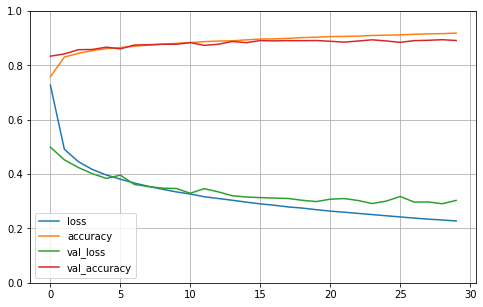

In [44]:
# Learning Curve

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [45]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 71.6557 - accuracy: 0.8455


[71.65574645996094, 0.8454999923706055]

In [46]:
# Using the model to make prediction

X_new=X_test[:3]
y_proba=model.predict(X_new)
y_proba.round(3)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [52]:
y_pred = model.predict(X_new)
classes_x=np.argmax(y_pred, axis=1)
classes_x


array([9, 2, 1])

In [53]:
np.array(class_names)[classes_x]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [54]:
y_new=y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [55]:
np.array(class_names)[y_new]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

# Building a Regression MLP Using the Sequential API

In [56]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [58]:
housing=fetch_california_housing()
housing

{'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars

In [59]:
X_train_full, X_test, y_train_full, y_test=train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid=train_test_split(X_train_full, y_train_full)

In [60]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_valid=sc.fit_transform(X_valid)
X_test=sc.fit_transform(X_test)

In [64]:
# Since we only want to predict a single value, we just use a single hidden layer with fever neurons
model=keras.models.Sequential([
                               keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
                               keras.layers.Dense(1)])

model.compile(loss='mean_squared_error', optimizer='sgd')
history=model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))


Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8570 - val_loss: 1.0940
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6413 - val_loss: 0.4767
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4722 - val_loss: 0.5501
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4654 - val_loss: 0.6472
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4703 - val_loss: 0.7447
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4510 - val_loss: 0.7861
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4377 - val_loss: 0.8841
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4294 - val_loss: 1.0256
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4281 - val_loss: 1.0963
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4211 - val_loss: 1.3280

In [65]:
mse_test=model.evaluate(X_test, y_test)


162/162 [==============================] - 0s 1ms/step - loss: 2.8725


In [66]:
X_new=X_test[:3]
y_pred=model.predict(X_new)

In [67]:
y_pred

array([[7.2997823],
       [0.5800898],
       [2.2042568]], dtype=float32)

In [68]:
X_new

array([[-0.86190106,  1.66133121, -1.12099585, -0.16549531, -0.73886182,
        -1.07651239, -0.58127798, -0.0595287 ],
       [-0.76417927,  0.0779274 , -0.89093227, -0.11332442,  0.48118718,
         0.83909249, -0.79146483,  0.69301668],
       [ 2.57586549, -0.63460431,  1.31246722, -0.25653862, -0.08873999,
         0.56514854, -0.86152711,  0.76777284]])